In [1]:
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, SparsePCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

lund_folder = tc.get_folder_path('Lund Folder')
lund = tc.processed_dataset(lund_folder)

lund_combined_thesis_props = lund.get_combined_thesis_props_no_correlation()
lund_combined_thesis_props.keys()

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes//


Index(['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
       'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
       'centroid-1', 'centroid-2', 'image_stdev',
       'avg distance of 6 closest points',
       'stddev distance of 6 closest points', 'touching neighbor count',
       'aspect_ratio'],
      dtype='object')

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_thesis_props_lund = scaler.fit_transform(lund_combined_thesis_props)

import umap

umap_reducer = umap.UMAP(n_components=7,n_neighbors=400,random_state=42)
embedding_7dims = umap_reducer.fit_transform(scaled_thesis_props_lund)

In [5]:
predictions_k2_to_8 = []

for i in range(2,9):
    clusterer = KMeans(n_clusters= i ,max_iter=3000, init= 'k-means++', random_state= 42)
    prediction = clusterer.fit_predict(embedding_7dims)
    predictions_k2_to_8.append(prediction)
    
ch_scores = [calinski_harabasz_score(embedding_7dims,pred) for pred in predictions_k2_to_8]
ASW_scores = [silhouette_score(embedding_7dims,pred) for pred in predictions_k2_to_8]

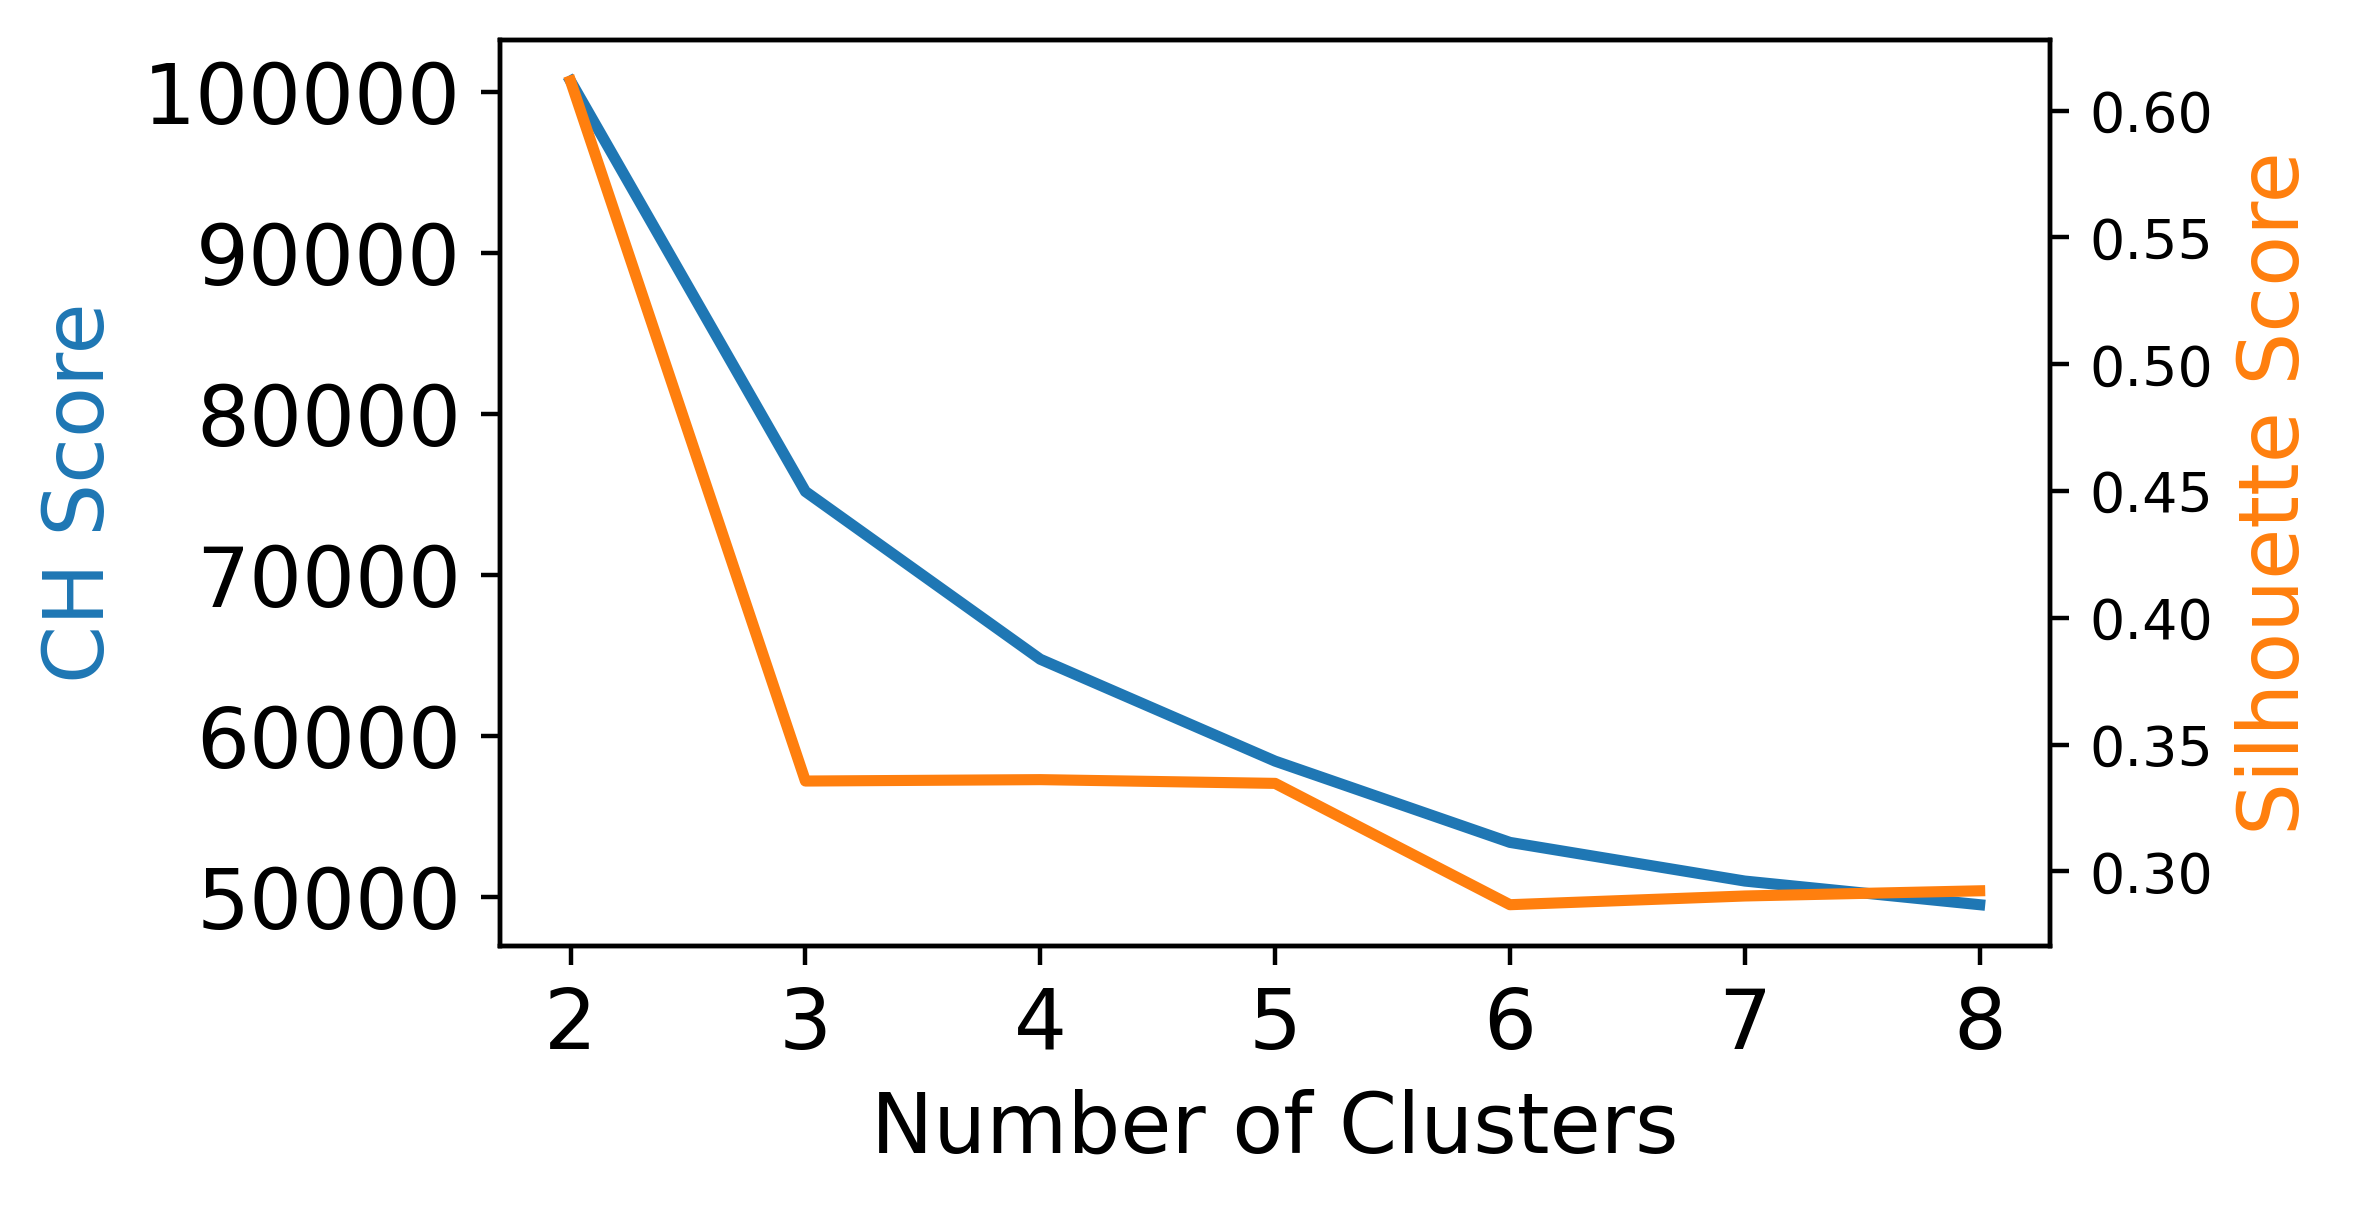

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
from matplotlib import cm
x = np.array(range(6))
cmap_list = cm.get_cmap(plt.get_cmap('tab20'))(x)[np.newaxis, :, :3][0]

lw = 2
big_fs = 15
small_fs = 15
a = 1

fig, ax1 = plt.subplots(1,1,figsize = (5,3))

ax1.plot(range(2,9),ch_scores,
         linewidth=lw,alpha =a,
         color = cmap_list[0])


ax1.set_xlabel('Number of Clusters', fontsize =big_fs)
ax1.set_ylabel('CH Score',fontsize= big_fs,color = cmap_list[0])
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)

# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(2,9), ASW_scores,
         linewidth=lw,alpha =a,
         color = cmap_list[2])
ax2.set_ylabel('Silhouette Score',fontsize= big_fs,color = cmap_list[2])
plt.show()

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\pyopencl\__init__.py:267: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\_qt\__init__.py:54: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully su

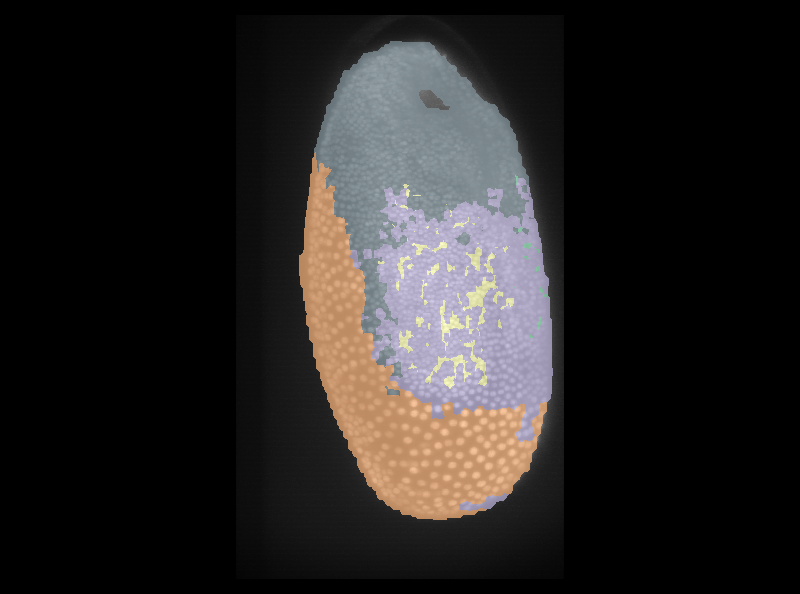

In [8]:
def gen_cluster_image_and_orig_image_from_dataset(dataset,timepoint,prediction, all_timepoint_predictionlist = True):
    from tribolium_clustering.data_visualisation import generate_parametric_cluster_image
    from pyclesperanto_prototype import push
    
    labels      = dataset.get_labels(timepoint)
    orig_image  = dataset.get_intensity_image(timepoint)
    cum_indices = dataset.cumulative_label_lengths()
    
    
    if all_timepoint_predictionlist:
        timepoint_pred = prediction[cum_indices[timepoint]:cum_indices[timepoint+1]]
    else:
        timepoint_pred = prediction
    
    cluster_image = generate_parametric_cluster_image(labels, push(labels), timepoint_pred)
    
    return cluster_image, orig_image

np_cmap = tc.napari_label_cmap()
rot_lund = (0,150,0)
import napari

img_5cl_t0, original_img_t0 = gen_cluster_image_and_orig_image_from_dataset(lund,0,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t0, rotate=rot_lund)
viewer.add_labels(img_5cl_t0,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

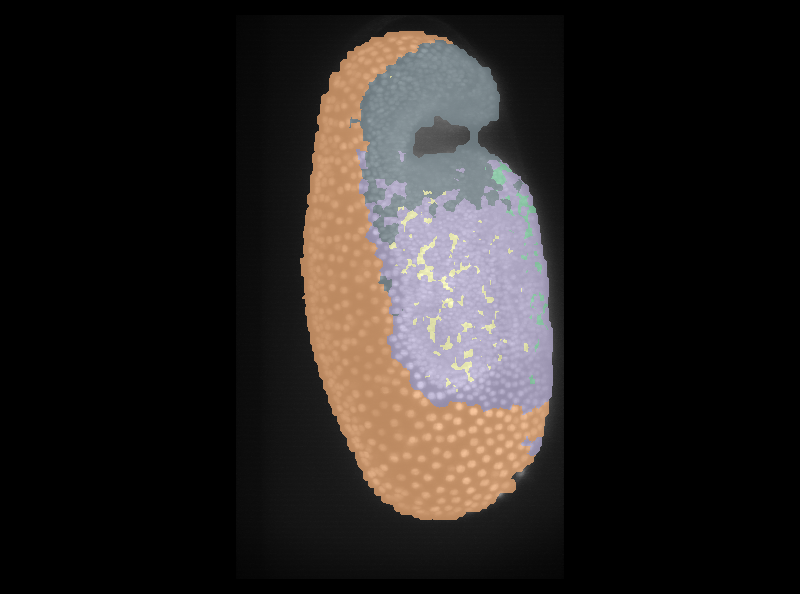

In [9]:
img_5cl, original_img = gen_cluster_image_and_orig_image_from_dataset(lund,6,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img, rotate=rot_lund)
viewer.add_labels(img_5cl,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

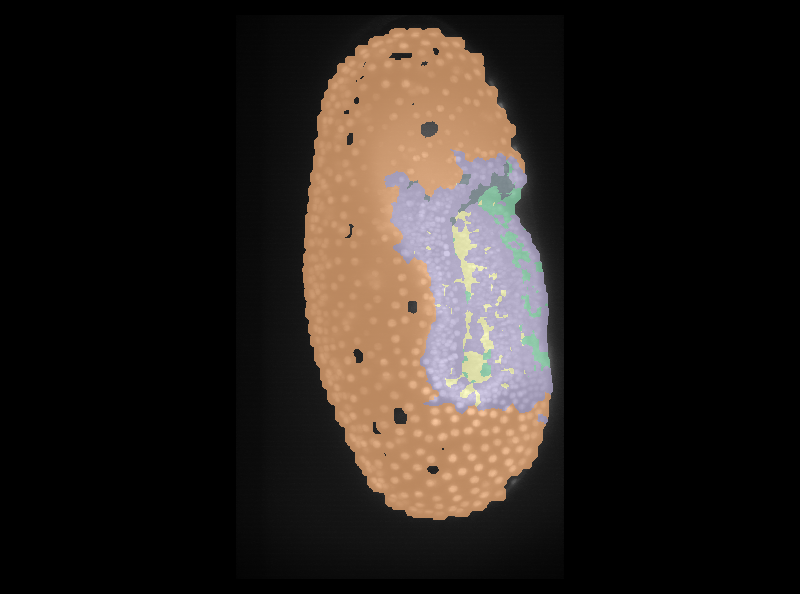

In [10]:
img_5cl, original_img = gen_cluster_image_and_orig_image_from_dataset(lund,12,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img, rotate=rot_lund)
viewer.add_labels(img_5cl,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

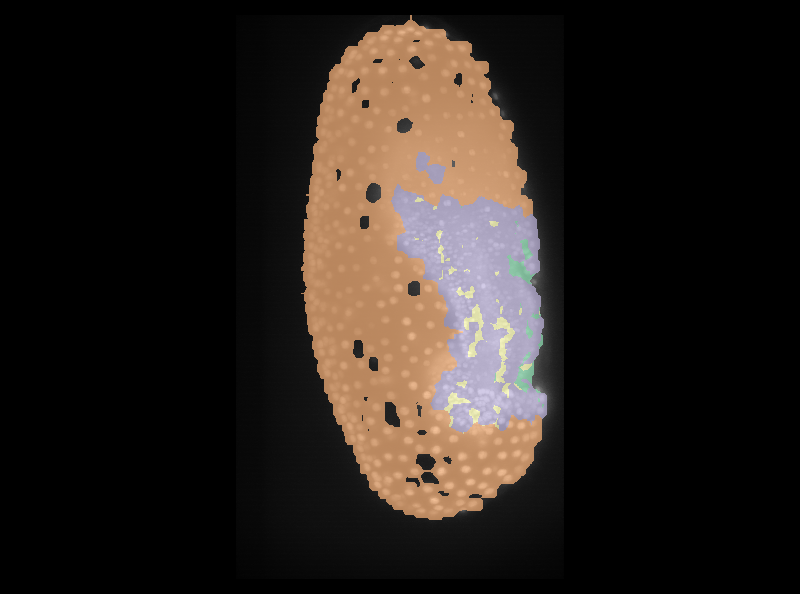

In [11]:
img_5cl, original_img = gen_cluster_image_and_orig_image_from_dataset(lund,24,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img, rotate=rot_lund)
viewer.add_labels(img_5cl,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)